# Case Study on ANOVA

XYZ Company has offices in four different zones. The company wishes to investigate the following :

    ● The mean sales generated by each zone. 
    ● Total sales generated by all the zones for each month.
    ● Check whether all the zones generate the same amount of sales. Help the company to carry out their study with the help of data provided.

## Importing the libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

 ## Reading the dataset to the python environment

In [2]:
data= pd.read_csv('Sales_data_zone_wise.csv')

### Preprocessing

In [4]:
data.head()
##checking whether the dataset is loaded properly

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


The given dataset is loaded properly

In [5]:
data.shape
##checking the shape of the dataset

(29, 5)

The given dataset consist of 29 rows and 5 columns

In [6]:
data.info()
##to get the basic information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


it consist of 4 integer datatype columns and 1 object type datatype column

In [8]:
data.isna().sum()
##Checking for any null values present in the dataset 

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

There are no null values present in the dataset

In [9]:
data.describe()
##Checking the statistics of columns

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


The mean , standard deviation,quartile , inter quartile range etc for different zones is shown above 

### Box plots depicting zone wise sales variation

<AxesSubplot:xlabel='Zone - B'>

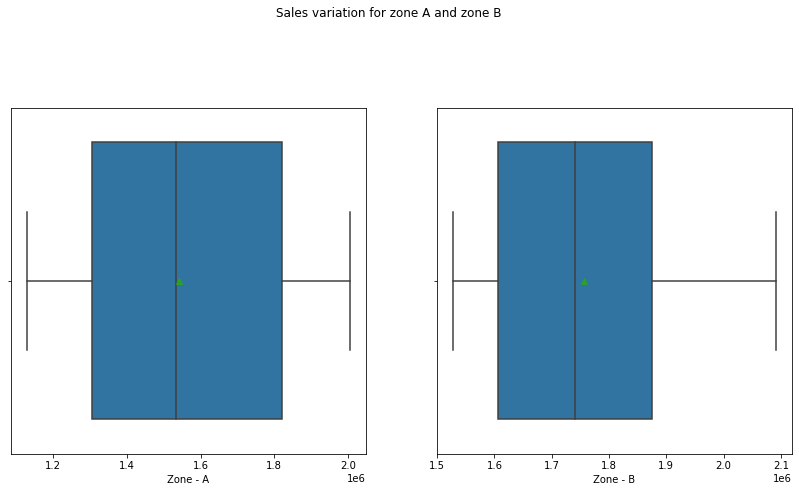

In [20]:
#Sales variation for zones A and B
plt.figure(figsize=(14,14))
plt.suptitle('Sales variation for zone A and zone B')
plt.subplot(2,2,1)
sns.boxplot(data['Zone - A'],showmeans=True)

plt.subplot(2,2,2)
sns.boxplot(data['Zone - B'],showmeans=True)

<AxesSubplot:xlabel='Zone - D'>

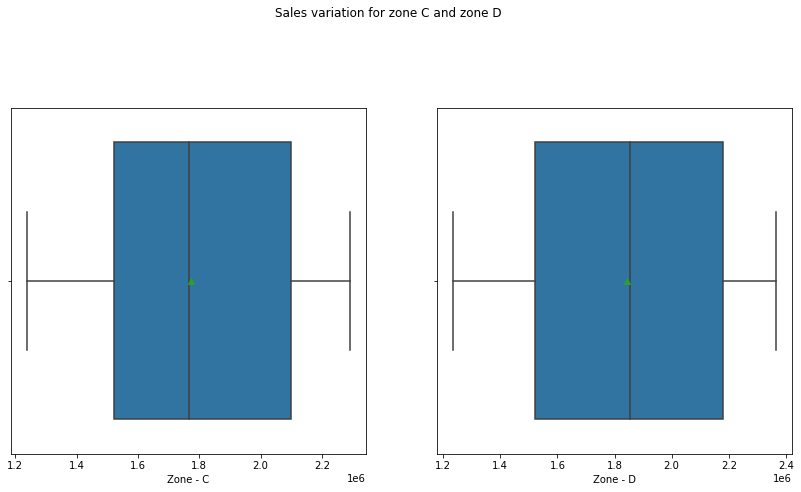

In [21]:
#Sales variation for zones C and D
plt.figure(figsize=(14,14))
plt.suptitle('Sales variation for zone C and zone D')
plt.subplot(2,2,1)
sns.boxplot(data['Zone - C'],showmeans=True)

plt.subplot(2,2,2)
sns.boxplot(data['Zone - D'],showmeans=True)

## 1.Investigating the mean sales generated by each zone. 

In [19]:
## The mean sales for zone A
print("The mean sales for zone A:",data['Zone - A'].mean())

## The mean sales for zone B
print("The mean sales for zone B:",data['Zone - B'].mean())

## The mean sales for zone C
print("The mean sales for zone C:",data['Zone - C'].mean())

## The mean sales for zone D
print("The mean sales for zone D:",data['Zone - D'].mean())

The mean sales for zone A: 1540493.1379310344
The mean sales for zone B: 1755559.5862068965
The mean sales for zone C: 1772871.0344827587
The mean sales for zone D: 1842926.7586206896


**The mean sales for zones B and C are almost equal , while mean sales for zone A is the lowest and that of zone D is the highest**

## 2.Total sales generated by all the zones for each month.

In [31]:
data['Total sales']=data.sum(axis=1)
data
##getting the total sales for different zones month wise

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Sum,Total sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544,14045088
1,Month - 2,1238428,1707421,2212113,1994341,7152303,14304606
2,Month - 3,1860771,2091194,1282374,1241600,6475939,12951878
3,Month - 4,1871571,1759617,2290580,2252681,8174449,16348898
4,Month - 5,1244922,1606010,1818334,1326062,5995328,11990656
5,Month - 6,1534390,1573128,1751825,2292044,7151387,14302774
6,Month - 7,1820196,1992031,1786826,1688055,7287108,14574216
7,Month - 8,1625696,1665534,2161754,2363315,7816299,15632598
8,Month - 9,1652644,1873402,1755290,1422059,6703395,13406790
9,Month - 10,1852450,1913059,1754314,1608387,7128210,14256420


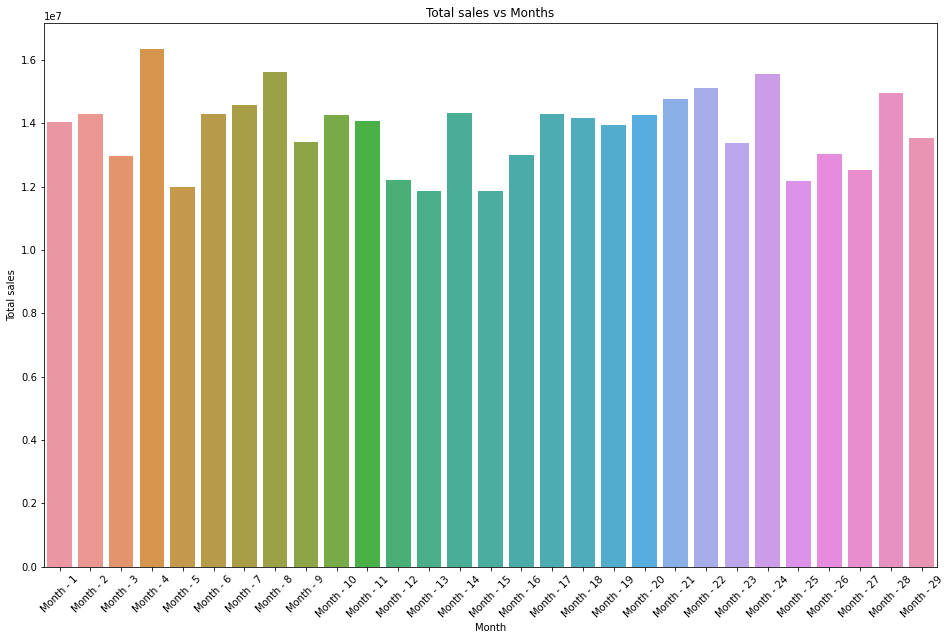

In [40]:
## depicting a bar plot of total sales for each months
plt.figure(figsize=(16,10))
plt.title('Total sales vs Months')
sns.barplot(data=data,x='Month',y='Total sales')
plt.xticks(rotation=45)
plt.show()

## 3.Check whether all the zones generate the same amount of sales. Help the company to carry out their study with the help of data provided.

.Inorder to check whether all the zones generate the same amount of sales we are using ANOVA test as more than one independent variable is present

.As these variables are compared with only the amount of sales we are using one way ANOVA test. 

In [41]:
#taking the null hypothesis(H0) and alternate hypothesis(H1)

**H0 : All the zones generate the same amount of sales**

**H1 : All the zones generate different amount of sales**

In [45]:
from scipy.stats import f_oneway

In [46]:
## getting the F statistic value and pvalue
fval,pval=f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])

print('F statistic is:',fval)
print('P value =',pval)

F statistic is: 5.672056106843581
P value = 0.0011827601694503335


**Here since the P value is less than 0.05,which is the significant value, we reject the null hypothesis**

**So we accept the alternate hypothesis and we could say that "All the zones generate different amount of sales"**